In [472]:
# Imports
import pandas as pd
import re
from tqdm import tqdm
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en import English
stopwords = English.Defaults.stop_words
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [456]:
# Reading CSV File into Pandas DataFrame
df = pd.read_csv('Data/ISEAR.csv', 
                 header = None)
print(df.shape)
df.drop(df.columns[2], axis = 1, inplace = True)

df.columns = ['emotions', 'texts']
print('Data Set Shape:', df.shape)
print(df.head())

(7516, 3)
Data Set Shape: (7516, 2)
  emotions                                              texts
0      joy  On days when I feel close to my partner and ot...
1     fear  Every time I imagine that someone I love or I ...
2    anger  When I had been obviously unjustly treated and...
3  sadness  When I think about the short time that we live...
4  disgust  At a gathering I found myself involuntarily si...


In [466]:
def tokenize(text):
    return [i.text for i in tokenizer(text)]

def plot_dist(token_list, count_list, xlabel, ylabel, title, filepath):
    dist_df = pd.DataFrame({'count_list': count_list, 'token_list': token_list})
    plt.style.use('ggplot')
    plt.figure(figsize = (7, 7))
    sns.barplot(x = 'count_list', y = 'token_list' , data = dist_df, orient = 'h')
    plt.xlabel(xlabel, size = 8)
    plt.ylabel(ylabel, size = 8)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.title(title, size = 10)
    plt.savefig(filepath)

100%|████████████████████████████████████| 1092/1092 [00:00<00:00, 79095.45it/s]


Vocab Size ( joy ): 2510
Vocab ( joy ): 
 {'I': 0, 'When': 1, 'friend': 2, 'got': 3, 'time': 4, 'passed': 5, 'felt': 6, 'happy': 7, 'joy': 8, 'good': 9, 'The': 10, 'year': 11, 'school': 12, 'friends': 13, 'A': 14, 'My': 15, 'came': 16, 'long': 17, 'exam': 18, 'told': 19, 'received': 20, 'met': 21, 'love': 22, 'university': 23, 's': 24, 'accepted': 25, 'day': 26, 'heard': 27, 'home': 28, 'girl': 29, 'After': 30, 'went': 31, 'It': 32, 'boyfriend': 33, 'examination': 34, 't': 35, 'selected': 36, 'We': 37, 'results': 38, 'close': 39, 'saw': 40, 'letter': 41, 'exams': 42, 'gave': 43, 'seen': 44, 'having': 45, 'years': 46, 'won': 47, 'months': 48, 'girlfriend': 49}


100%|████████████████████████████████████| 1076/1076 [00:00<00:00, 69898.57it/s]


Vocab Size ( fear ): 3089
Vocab ( fear ): 
 {'I': 0, 'When': 1, 'night': 2, 'afraid': 3, 'home': 4, 'car': 5, 'fear': 6, 'felt': 7, 'time': 8, 'The': 9, 'friend': 10, 'house': 11, 'went': 12, 'dark': 13, 'going': 14, 'day': 15, 'came': 16, 'My': 17, 's': 18, 'A': 19, 'school': 20, 't': 21, 'It': 22, 'One': 23, 'scared': 24, 'father': 25, 'got': 26, 'saw': 27, 'road': 28, 'know': 29, 'thought': 30, 'man': 31, 'walking': 32, 'accident': 33, 'way': 34, 'people': 35, 'suddenly': 36, 'mother': 37, 'friends': 38, 'late': 39, 'frightened': 40, 'started': 41, 'heard': 42, 'feared': 43, 'We': 44, 'exam': 45, 'told': 46, 'away': 47, 'room': 48, 'dog': 49}


100%|████████████████████████████████████| 1079/1079 [00:00<00:00, 67131.26it/s]


Vocab Size ( anger ): 3279
Vocab ( anger ): 
 {'I': 0, 'When': 1, 'angry': 2, 'friend': 3, 't': 4, 'My': 5, 'A': 6, 'time': 7, 'told': 8, 'got': 9, 's': 10, 'felt': 11, 'mother': 12, 'person': 13, 'friends': 14, 'day': 15, 'brother': 16, 'people': 17, 'father': 18, 'didn': 19, 'The': 20, 'anger': 21, 'school': 22, 'boyfriend': 23, 'home': 24, 'work': 25, 'went': 26, 'He': 27, 'wanted': 28, 'came': 29, 'things': 30, 'asked': 31, 'car': 32, 'said': 33, 'sister': 34, 'having': 35, 'room': 36, 'money': 37, 'It': 38, 'girlfriend': 39, 'In': 40, 'We': 41, 'One': 42, 'way': 43, 'girl': 44, 'away': 45, 'tried': 46, 'This': 47, 'found': 48, 'parents': 49}


100%|████████████████████████████████████| 1082/1082 [00:00<00:00, 82438.45it/s]


Vocab Size ( sadness ): 2454
Vocab ( sadness ): 
 {'I': 0, 'When': 1, 'died': 2, 'friend': 3, 'sad': 4, 'My': 5, 'felt': 6, 'time': 7, 'father': 8, 'The': 9, 'away': 10, 'mother': 11, 't': 12, 'A': 13, 'close': 14, 'years': 15, 's': 16, 'home': 17, 'death': 18, 'friends': 19, 'left': 20, 'boyfriend': 21, 'grandmother': 22, 'passed': 23, 'heard': 24, 'relationship': 25, 'It': 26, 'girl': 27, 'grandfather': 28, 'told': 29, 'got': 30, 'family': 31, 'girlfriend': 32, 'brother': 33, 'day': 34, 'sister': 35, 'good': 36, 'thought': 37, 'school': 38, 'year': 39, 'went': 40, 'parents': 41, 'He': 42, 'accident': 43, 'She': 44, 'person': 45, 'old': 46, 'long': 47, 'sadness': 48, 'failed': 49}


100%|████████████████████████████████████| 1066/1066 [00:00<00:00, 73583.07it/s]


Vocab Size ( disgust ): 3334
Vocab ( disgust ): 
 {'I': 0, 'When': 1, 'disgusted': 2, 'saw': 3, 'felt': 4, 'A': 5, 'people': 6, 'friend': 7, 'man': 8, 'The': 9, 't': 10, 'disgust': 11, 'person': 12, 's': 13, 'drunk': 14, 'friends': 15, 'like': 16, 'time': 17, 'girl': 18, 'got': 19, 'My': 20, 'bus': 21, 'found': 22, 'He': 23, 'came': 24, 'day': 25, 'went': 26, 'way': 27, 'It': 28, 'school': 29, 'woman': 30, 'home': 31, 'feel': 32, 'having': 33, 'One': 34, 'didn': 35, 'In': 36, 'told': 37, 'started': 38, 'At': 39, 'tried': 40, 'boyfriend': 41, 'film': 42, 'house': 43, 'room': 44, 'wanted': 45, 'sister': 46, 'bad': 47, 'father': 48, 'old': 49}


100%|████████████████████████████████████| 1071/1071 [00:00<00:00, 67477.31it/s]


Vocab Size ( shame ): 2822
Vocab ( shame ): 
 {'I': 0, 'When': 1, 'ashamed': 2, 'felt': 3, 'friend': 4, 't': 5, 'time': 6, 's': 7, 'told': 8, 'My': 9, 'class': 10, 'mother': 11, 'people': 12, 'friends': 13, 'day': 14, 'found': 15, 'person': 16, 'girl': 17, 'shame': 18, 'asked': 19, 'didn': 20, 'teacher': 21, 'came': 22, 'got': 23, 'said': 24, 'A': 25, 'parents': 26, 'The': 27, 'having': 28, 'school': 29, 'went': 30, 'feel': 31, 'know': 32, 'caught': 33, 'good': 34, 'thought': 35, 'boyfriend': 36, 'girlfriend': 37, 'wrong': 38, 'failed': 39, 'later': 40, 'father': 41, 'place': 42, 'In': 43, 'party': 44, 'home': 45, 'drunk': 46, 'boy': 47, 'answer': 48, 'Not': 49}


100%|████████████████████████████████████| 1049/1049 [00:00<00:00, 68356.35it/s]

Vocab Size ( guilt ): 2809
Vocab ( guilt ): 
 {'I': 0, 'When': 1, 'felt': 2, 'guilty': 3, 'friend': 4, 'mother': 5, 't': 6, 's': 7, 'time': 8, 'told': 9, 'My': 10, 'went': 11, 'home': 12, 'parents': 13, 'day': 14, 'got': 15, 'didn': 16, 'person': 17, 'sister': 18, 'A': 19, 'asked': 20, 'friends': 21, 'The': 22, 'father': 23, 'feel': 24, 'brother': 25, 'having': 26, 'guilt': 27, 'boyfriend': 28, 'school': 29, 'work': 30, 'wanted': 31, 'girl': 32, 'money': 33, 'later': 34, 'car': 35, 'found': 36, 'thought': 37, 'said': 38, 'came': 39, 'help': 40, 'close': 41, 'people': 42, 'going': 43, 'took': 44, 'late': 45, 'little': 46, 'One': 47, 'bad': 48, 'After': 49}



100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 8473.34it/s]


Vocab Size ( guit ): 39
Vocab ( guit ): 
 {'I': 0, 'avoid': 1, 'work': 2, 'tried': 3, 'want': 4, 'At': 5, 'hostel': 6, 'roommate': 7, 'selfish': 8, 'person': 9, 'anyhting': 10, 'concern': 11, 'A': 12, 'prepared': 13, 'lunch': 14, 'decided': 15, 'share': 16, 'My': 17, 'roomate': 18, 'promised': 19, 'wash': 20, 'bowls': 21, 'everytime': 22, 'dinner': 23, 'wait': 24, 'thought': 25, 'realize': 26, 'fault': 27, 'tell': 28, 'university': 29, 'student': 30, 'ought': 31, 'self': 32, 'respect': 33, 'He': 34, 'disappointed': 35, 'time': 36, 'saw': 37, 'contact': 38}


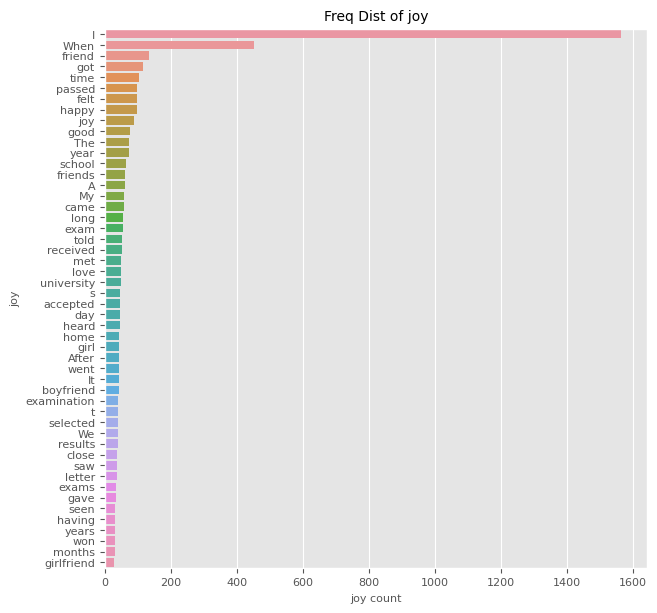

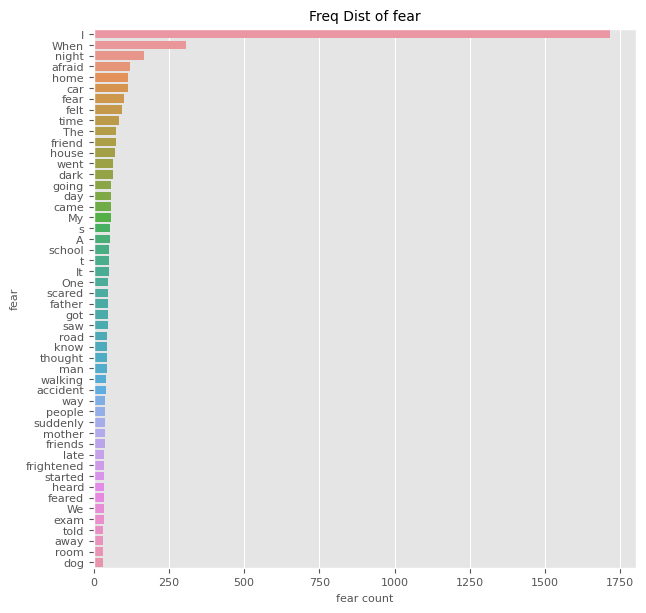

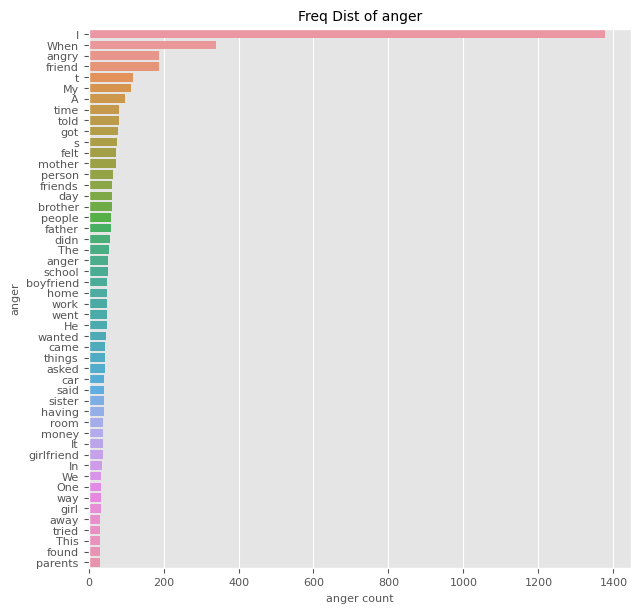

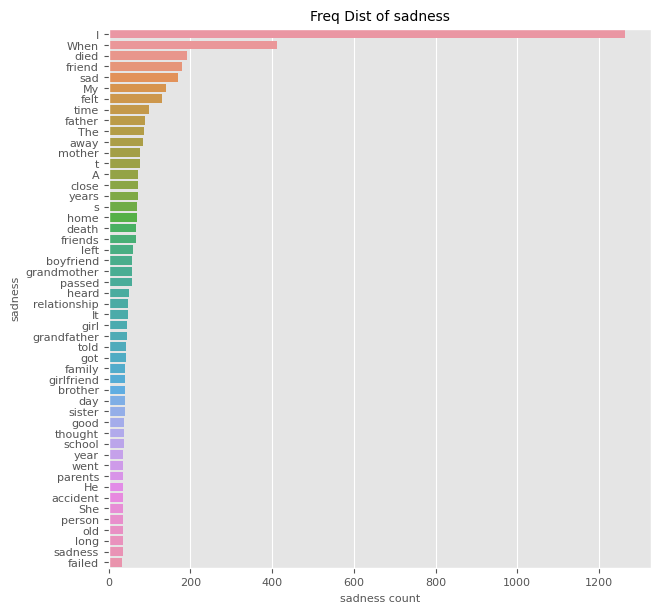

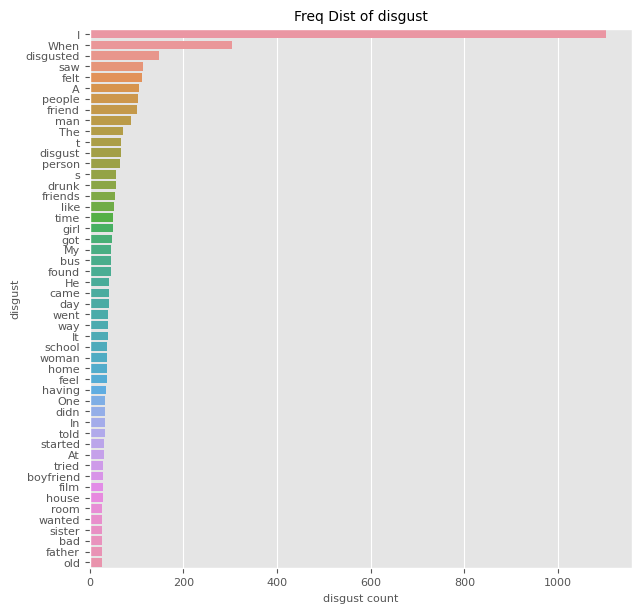

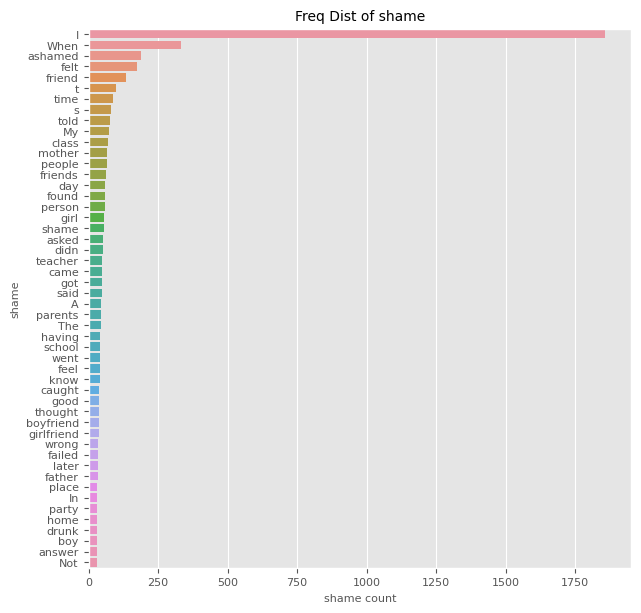

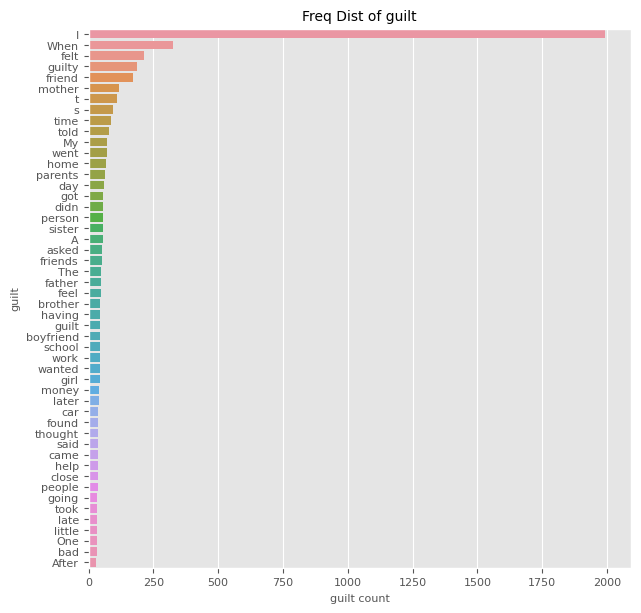

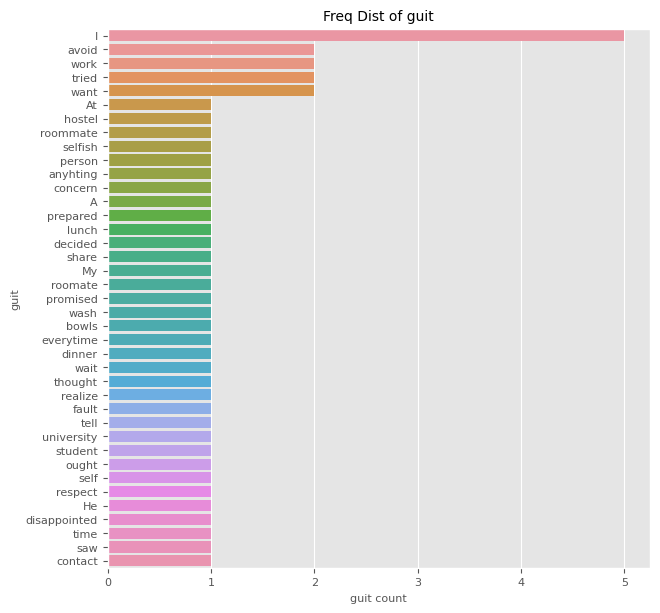

In [477]:
# Find Unique Emotions
unique_emotions = df['emotions'].unique()

# Group By Emotions
emotions_group_df = df.groupby('emotions', sort = False)

def find_max_min_avg(df):
    length_of_texts = df.str.split("\\s+")
    MAX_LEN = length_of_texts.str.len().max()
    MIN_LEN = length_of_texts.str.len().min()
    AVG_LEN = round(length_of_texts.str.len().mean(), 2)
    return MAX_LEN, MIN_LEN, AVG_LEN

list_of_dict = []
for emotion in unique_emotions:
    emotion_dataF = emotions_group_df.get_group(emotion).copy()
    max_min_avg = find_max_min_avg(emotion_dataF['texts'])
    temp_dict = {}
    temp_dict['Emotion Name'] = emotion
    temp_dict['Max-Length'] = max_min_avg[0]
    temp_dict['Min-Length'] = max_min_avg[1]
    temp_dict['Avg-Length'] = max_min_avg[2]
    list_of_dict.append(temp_dict)
    
    emotion_dataF['text_without_nonalpha'] = emotion_dataF['texts'].str.replace(r'[^A-Za-z]+', ' ', regex = True)
    emotion_dataF['texts_without_stopwords'] = emotion_dataF['text_without_nonalpha'].apply(lambda text: ' '.join([word for word in tokenize(text) if word not in (stopwords)]))
    emotion_dataF = emotion_dataF.drop(['texts', 'text_without_nonalpha'], axis = 1)
    emotion_dataF = emotion_dataF.rename(columns = {'texts_without_stopwords': 'texts'})
    
    all_tokens = []
    for emo in tqdm(emotion_dataF['texts']):
        tokens = tokenizer(emo)
        all_tokens.extend([i.text for i in tokens])
    count = Counter(all_tokens)
    print('Vocab Size (', emotion, '):' , len(count))
    
    tokens_and_counts = count.most_common(50)
    tokens, counts = zip(*tokens_and_counts)
    vocab = {token: idx for idx, token in enumerate(tokens)}
    print('Vocab (', emotion, '): \n', vocab)
    
    token_list = [tup[0] for tup in tokens_and_counts]
    count_list = [tup[1] for tup in tokens_and_counts]
    filepath = 'Images/' + emotion + '_dist_part1.png'
    plot_dist(token_list, count_list, emotion + ' count', emotion, 'Freq Dist of ' + emotion, filepath)

In [478]:
# Converting Dictionary to CSV
emotions_df = pd.DataFrame.from_dict(list_of_dict)
emotions_df.to_csv('emotions_df.csv', index = False, sep = '\t')
print('\n Tab Delimited CSV: \n', emotions_df)


 Tab Delimited CSV: 
   Emotion Name  Max-Length  Min-Length  Avg-Length
0          joy         122           1       19.60
1         fear         119           2       23.95
2        anger         101           2       24.57
3      sadness         102           2       19.81
4      disgust         178           1       21.27
5        shame         169           1       22.36
6        guilt         159           1       23.94
7         guit         110         110      110.00
